In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import statsmodels.formula.api as sm
import scipy
import scipy.stats as st
import seaborn as sns

In [4]:
data = pd.read_csv("merged.csv")#.set_index("id_number")
target = 'Distress (0) vs. Suicide (1)'
features = ['Depression', 'Self-harm', 'Eye gaze', 'Gender', 'Age', 'Ethnicity', 'Short-term/Chronic distress', 'Crying', 'Hopelessness', 'Anhedonia', 'Impulsiveness', 'Lability', 'Guilt', 'Entrapment', 'Social Alienation']
numerical_features = ['Depression', 'Self-harm', 'Eye gaze', 'Gender', 'Age', 'Short-term/Chronic distress', 'Crying', 'Hopelessness', 'Anhedonia', 'Impulsiveness', 'Lability', 'Guilt', 'Entrapment', 'Social Alienation']
continuous_features = ['Depression']
column_headers = ['Depression', 'Self-harm', 'Eye gaze', 'Distress (0) vs. Suicide (1)', 'Gender', 'Age', 'Ethnicity', 'Short-term/Chronic distress', 'Crying', 'Hopelessness', 'Anhedonia', 'Impulsiveness', 'Lability', 'Guilt', 'Entrapment', 'Social Alienation']
np_data = data.values
#print(data)


In [5]:
# Present summary statistics for categorical variables
for var in column_headers:
    # Provide the count of observations in each category
    if var in continuous_features:
        continue
    print(data.groupby(var).size())
    print("")
    #TODO
    #pass

Self-harm
0    54
1    21
2     7
3     8
dtype: int64

Eye gaze
0    18
1    72
dtype: int64

Distress (0) vs. Suicide (1)
0    60
1    30
dtype: int64

Gender
0    36
1    54
dtype: int64

Age
0    50
1    40
dtype: int64

Ethnicity
african                        3
african american               7
american                       9
american/norway                1
black                          4
british                        1
caucasian                     42
caucasian/african american     1
caucassian                     1
indian                         2
latin american                 1
white                         18
dtype: int64

Short-term/Chronic distress
0    64
1    26
dtype: int64

Crying
0    55
1    35
dtype: int64

Hopelessness
0    66
1    24
dtype: int64

Anhedonia
0    89
1     1
dtype: int64

Impulsiveness
0    87
1     3
dtype: int64

Lability
0    86
1     4
dtype: int64

Guilt
0    83
1     7
dtype: int64

Entrapment
0    65
1    25
dtype: int64

Social Alienation

In [7]:

for var in continuous_features:
    print(data[var].describe())

count    90.000000
mean      3.266667
std       1.420555
min       0.000000
25%       2.250000
50%       3.000000
75%       4.000000
max       5.000000
Name: Depression, dtype: float64


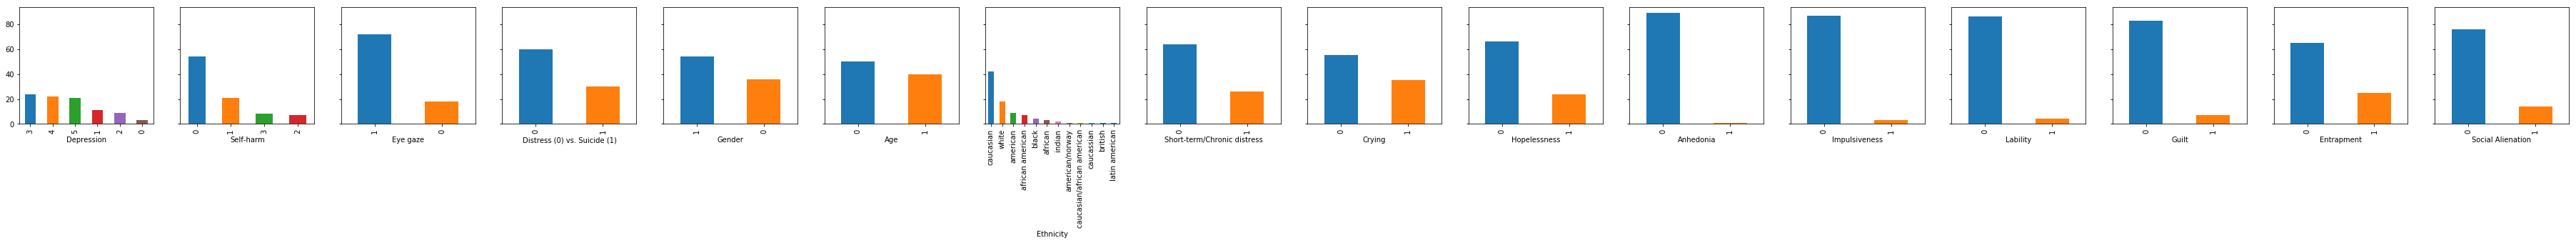

In [4]:
# visualize categorical variables

fig,ax = plt.subplots(
    1, len(column_headers), 
    figsize=(len(column_headers)*4, 3), 
    sharey=True,
)

for i,var in enumerate(column_headers):
    plt.sca(ax[i])
    ax[i].set_xlabel(var)
    ax[i] = data[var].value_counts().plot(kind='bar')
    #TODO
    #pass


/shared/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


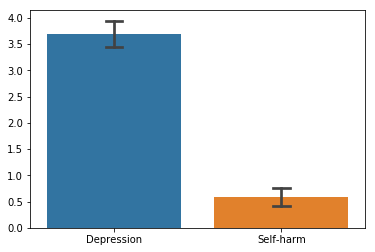

In [25]:
ax = sns.barplot( data=data.loc[:, :'Eye gaze'] , capsize=.1, ci=95)

/shared/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


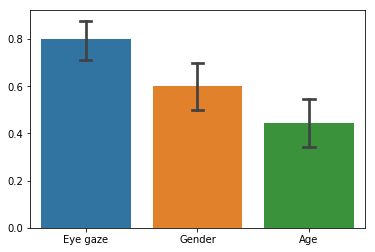

In [7]:
#ax = sns.barplot( data=data.loc[:, 'Eye gaze':'Ethnicity'] , capsize=.1, ci=95)
ax = sns.barplot( data=data.loc[:, ['Eye gaze', 'Gender', 'Age']] , capsize=.1, ci=95)

/shared/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


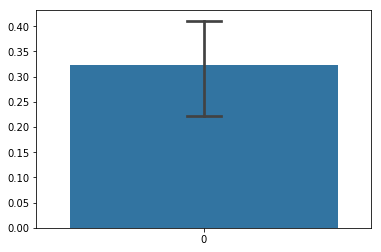

In [24]:
ax = sns.barplot( data=data.loc[:, 'Distress (0) vs. Suicide (1)'] , capsize=.1, ci=95)
                                
                                
                                

/shared/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


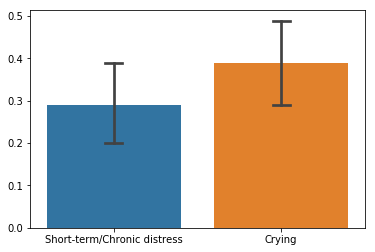

In [9]:
ax = sns.barplot( data=data.loc[:, 'Short-term/Chronic distress':'Crying'] , capsize=.1, ci=95)

/shared/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


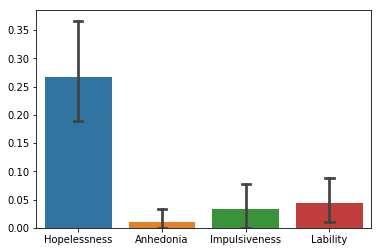

In [10]:
ax = sns.barplot( data=data.loc[:, 'Hopelessness':'Lability'] , capsize=.1, ci=95)

/shared/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


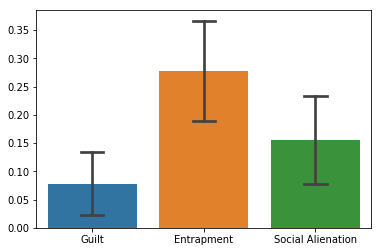

In [11]:
ax = sns.barplot( data=data.loc[:,  'Guilt':] , capsize=.2, ci=95)

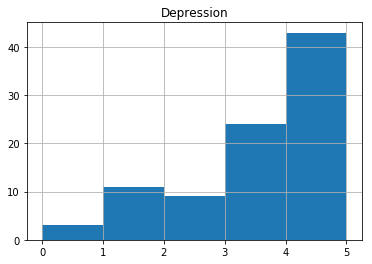

In [9]:
#Visualize continuous variables
for i, var in enumerate(continuous_features):
    data.hist(column=var, bins=5)

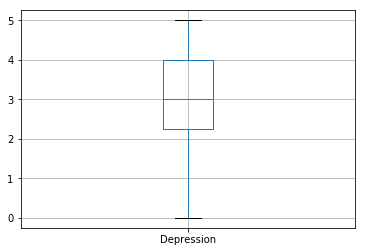

In [10]:
#Visualize continuous variables
data.boxplot(column=continuous_features)

In [16]:
def bootstrap_ci_arg(x, func=np.mean, feature=None, nboot=2000, interval=0.95, *args, **kwargs):
    """
    Perform nonparametric bootstrap and estimate percentile CI 
    Returns the sample estimate for func 
    and the interval% confidence interval for func
    
    """
    f_val = np.zeros(nboot)
    for i in range(nboot):
        #f_val[i] = x.sample(n=x.shape[0], replace=True, random_state=i).mean()
        if feature == None:
            f_val[i] = func(x.sample(n=x.shape[0], replace=True, random_state=i))
        else:
            f_val[i] = func(x.sample(n=x.shape[0], replace=True, random_state=i), feature=feature)
    #TODO
    #m, ci_l, ci_h = mean_confidence_interval(f_val, interval)
    m = np.median(f_val)
    ci_l = np.percentile(f_val, 2.5)
    ci_h = np.percentile(f_val, 97.5)
    #ci_l, ci_h = sm.DescrStatsW(f_val).tconfint_mean()
    #ci_l, ci_h  = st.t.interval(0.95, len(f_val)-1, loc=np.mean(f_val), scale=st.sem(f_val))
    return  m, ci_l, ci_h, f_val

In [14]:
def standardized_mean_diff(df, feature='Depression', target='Distress (0) vs. Suicide (1)', mean=np.nanmean, std=np.nanstd):
    #TODO
    mean1 = mean(df[df[target] == 0][feature])
    std1 = std(df[df[target] == 0][feature])
    mean2 = mean(df[df[target] == 1][feature])
    std_diff = (mean1 - mean2)/std1
    return std_diff

def mean_diff(df, feature='Depression', target='Distress (0) vs. Suicide (1)', mean=np.nanmean, std=np.nanstd):
    #TODO
    mean1 = mean(df[df[target] == 0][feature])
    mean2 = mean(df[df[target] == 1][feature])
    mean_diff = (mean1 - mean2)
    return mean_diff

In [11]:
# calculate the count of each numerical variable for the 2 target classes
target='Distress (0) vs. Suicide (1)'
tot_features = numerical_features + continuous_features
for feature in tot_features:
    df = data.loc[:, [feature, target]]
    print(df.groupby(target).agg([np.mean]))

                             Depression
                                   mean
Distress (0) vs. Suicide (1)           
0                              2.716667
1                              4.366667
                             Self-harm
                                  mean
Distress (0) vs. Suicide (1)          
0                             0.216667
1                             1.533333
                              Eye gaze
                                  mean
Distress (0) vs. Suicide (1)          
0                             0.783333
1                             0.833333
                                Gender
                                  mean
Distress (0) vs. Suicide (1)          
0                             0.633333
1                             0.533333
                                   Age
                                  mean
Distress (0) vs. Suicide (1)          
0                             0.400000
1                             0.533333
                    

In [40]:
target='Distress (0) vs. Suicide (1)'
tot_features =  numerical_features + continuous_features
cname = []
stddiff = []
ignore = []
for feature in tot_features:
    df = data.loc[:, [feature, target]]
    m, c_l, c_u, f_val = bootstrap_ci_arg(df, func=standardized_mean_diff, feature=feature)
    print("Standardized mean difference (m, c_l, c_u) for "+ feature + " is (" + str(m) + ", " + str(c_l) + ", " + str(c_u) + ")")
    if c_l > 0 or c_u < 0:
        print("Statistically significant difference for feature: " + feature)
    else:
        print("Statistically NOT significant difference for feature: " + feature)
        
    print("")
    
    cname.append(feature)
    stddiff.append(f_val)
    if (np.isfinite(m) and np.isfinite(c_l) and np.isfinite(c_u)):
        ignore.append(0)
    else:
        ignore.append(1)

stddiff = np.array(stddiff)
ignore = np.array(ignore)
cname = np.array(cname)
cname = cname[ignore == 0]
stddiff = stddiff[ignore == 0]
stddiff = np.transpose(stddiff)
cname = cname.tolist()
stddiff_pd = pd.DataFrame(stddiff,  columns=cname)
import seaborn as sns
sns.set(style="whitegrid")

new_feats = np.array(tot_features)
new_feats = new_feats[ignore == 0].tolist()
    
    

Standardized mean difference (m, c_l, c_u) for Depression is (-1.3560042951421938, -1.7800331505966938, -0.9252699328613228)
Statistically significant difference for feature: Depression



/shared/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


Standardized mean difference (m, c_l, c_u) for Self-harm is (-2.1101894665564083, -4.653560484113509, -1.2313873675920797)
Statistically significant difference for feature: Self-harm

Standardized mean difference (m, c_l, c_u) for Eye gaze is (-0.1310870742812706, -0.48350376812363705, 0.3536022039869313)
Statistically NOT significant difference for feature: Eye gaze

Standardized mean difference (m, c_l, c_u) for Gender is (0.19413670627927215, -0.2594506661467978, 0.7072101617501712)
Statistically NOT significant difference for feature: Gender

Standardized mean difference (m, c_l, c_u) for Age is (-0.2890775585242244, -0.7767406675725028, 0.19839873537037506)
Statistically NOT significant difference for feature: Age

Standardized mean difference (m, c_l, c_u) for Short-term/Chronic distress is (-1.6180894921410374, -3.0808099411933227, -0.8933736227313027)
Statistically significant difference for feature: Short-term/Chronic distress

Standardized mean difference (m, c_l, c_u) for Cr

/shared/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/shared/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/shared/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


Standardized mean difference (m, c_l, c_u) for Impulsiveness is (nan, nan, nan)
Statistically NOT significant difference for feature: Impulsiveness

Standardized mean difference (m, c_l, c_u) for Lability is (nan, nan, nan)
Statistically NOT significant difference for feature: Lability

Standardized mean difference (m, c_l, c_u) for Guilt is (-0.13868546752663163, -1.3890765517201626, 0.2818642174509125)
Statistically NOT significant difference for feature: Guilt

Standardized mean difference (m, c_l, c_u) for Entrapment is (-1.083977093680432, -2.076392459800776, -0.46184430857096326)
Statistically significant difference for feature: Entrapment

Standardized mean difference (m, c_l, c_u) for Social Alienation is (-0.545677316362528, -1.5289323344312375, -0.012299760501283301)
Statistically significant difference for feature: Social Alienation

Standardized mean difference (m, c_l, c_u) for Depression is (-1.3560042951421938, -1.7800331505966938, -0.9252699328613228)
Statistically sign

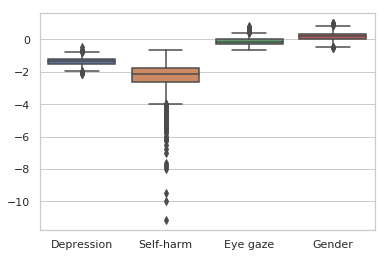

In [41]:
#Can only be run after previous cell has been run
new_feats = np.array(tot_features)
new_feats = new_feats[ignore == 0].tolist()
ax = sns.boxplot(data = stddiff_pd.loc[:, :new_feats[3]]) 
 


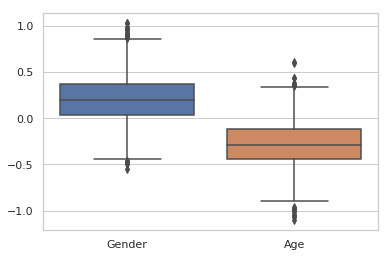

In [42]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[3]:new_feats[4]])

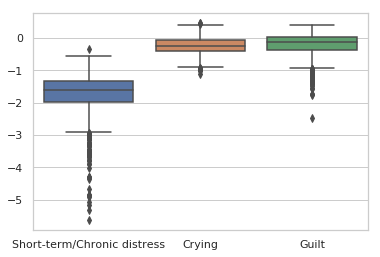

In [43]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[5]:new_feats[7]])

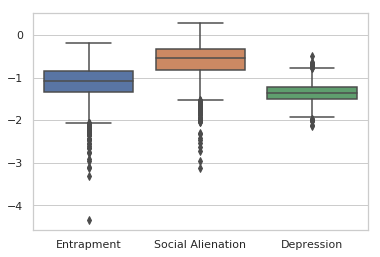

In [44]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[8]:])

In [48]:
def pearson_corr(df, feature, target='Distress (0) vs. Suicide (1)'): #Pearson Correlation
    #TODO
    corr = scipy.stats.pearsonr(df[feature],df[target])[0]
    return corr

In [ ]:
# calculate pearson correlation between features and target
#  and construct a 95% confidence interval
#TODO
target='Distress (0) vs. Suicide (1)'
cname = []
stddiff = []
ignore = []
tot_features = numerical_features + continuous_features
for feature in tot_features:
    df = data.loc[:, [feature, target]]
    m, c_l, c_u = bootstrap_ci_arg(df, func=pearson_corr, feature=feature)
    print("Correlation (m, c_l, c_u) for "+ feature + " with target is (" + str(m) + ", " + str(c_l) + ", " + str(c_u) + ")")
    if c_l > 0 or c_u < 0:
        print("Statistically significant correlation for feature: " + feature)
    else:
        print("Statistically NOT significant correlation for feature: " + feature)
        
    print("")
        
    cname.append(feature)
    stddiff.append(f_val)
    if (np.isfinite(m) and np.isfinite(c_l) and np.isfinite(c_u)):
        ignore.append(0)
    else:
        ignore.append(1)

stddiff = np.array(stddiff)
ignore = np.array(ignore)
cname = np.array(cname)
cname = cname[ignore == 0]
stddiff = stddiff[ignore == 0]
stddiff = np.transpose(stddiff)
cname = cname.tolist()
stddiff_pd = pd.DataFrame(stddiff,  columns=cname)
import seaborn as sns
sns.set(style="whitegrid")

new_feats = np.array(tot_features)
new_feats = new_feats[ignore == 0].tolist()

In [ ]:
#Run only after running the previous cell
ax = sns.boxplot(data = stddiff_pd.loc[:, :new_feats[3]])

In [ ]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[3]:new_feats[4]])

In [ ]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[5]:new_feats[7]])

In [ ]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[8]:])

In [57]:
import dython #For nominal correlations Cramer's V and Thiel's U
from dython.nominal import *
def cramers_corr(df, feature, target='Distress (0) vs. Suicide (1)'):
    y = df[feature]
    x = df[target]
    corr =  cramers_v(x, y)
    return corr

def thiels_corr(df, feature, target='Distress (0) vs. Suicide (1)'):
    y = df[feature]
    x = df[target]
    corr =  theils_u(x, y)
    return corr

In [55]:
#import dython #For nominal correlations Cramer's V and Thiel's U
#from dython.nominal import *
#x = data['Distress (0) vs. Suicide (1)']
#y = data['Age']
#cramer_corr = cramers_v(x, y)
#thiels_corr = theils_u(x, y)

#print("Cramer's V correlation is:" + str(cramer_corr))
#print("Thiel's U correlation is:" + str(thiels_corr))

Cramer's V correlation is:0.0
Thiel's U correlation is:0.012536032268675867


In [60]:
target='Distress (0) vs. Suicide (1)'
for feature in numerical_features:
    df = data.loc[:, [feature, target]]
    m, c_l, c_u = bootstrap_ci_arg(df, func=cramers_corr, feature=feature)
    print("Cramers Correlation (m, c_l, c_u) for "+ feature + " with target is (" + str(m) + ", " + str(c_l) + ", " + str(c_u) + ")")
    if m > 0.1:
        print("Statistically significant correlation for feature: " + feature)
    else:
        print("Statistically NOT significant correlation for feature: " + feature)
        
    print("")

Cramers Correlation (m, c_l, c_u) for Depression with target is (0.6534342506562857, 0.4889338683426019, 0.7910535387349912)
Statistically significant correlation for feature: Depression

Cramers Correlation (m, c_l, c_u) for Self-harm with target is (0.8538037014730553, 0.7329870714642377, 0.9416966831232153)
Statistically significant correlation for feature: Self-harm

Cramers Correlation (m, c_l, c_u) for Eye gaze with target is (0.0, 0.0, 0.19735979597606398)
Statistically NOT significant correlation for feature: Eye gaze

Cramers Correlation (m, c_l, c_u) for Gender with target is (0.0, 0.0, 0.2636619672150732)
Statistically NOT significant correlation for feature: Gender

Cramers Correlation (m, c_l, c_u) for Age with target is (0.03555469731537219, 0.0, 0.29864483662906216)
Statistically NOT significant correlation for feature: Age

Cramers Correlation (m, c_l, c_u) for Short-term/Chronic distress with target is (0.5013514780394341, 0.29576659995050164, 0.6819814575074832)
Stati

/home/vasu/.local/lib/python3.7/site-packages/dython/nominal.py:59: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
/shared/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/shared/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


Cramers Correlation (m, c_l, c_u) for Anhedonia with target is (nan, nan, nan)
Statistically NOT significant correlation for feature: Anhedonia

Cramers Correlation (m, c_l, c_u) for Impulsiveness with target is (nan, nan, nan)
Statistically NOT significant correlation for feature: Impulsiveness

Cramers Correlation (m, c_l, c_u) for Lability with target is (nan, nan, nan)
Statistically NOT significant correlation for feature: Lability

Cramers Correlation (m, c_l, c_u) for Guilt with target is (0.0, 0.0, 0.21284687592950297)
Statistically NOT significant correlation for feature: Guilt

Cramers Correlation (m, c_l, c_u) for Entrapment with target is (0.36501181257566073, 0.13412588242823678, 0.5618032327803526)
Statistically significant correlation for feature: Entrapment

Cramers Correlation (m, c_l, c_u) for Social Alienation with target is (0.14470573947993648, 0.0, 0.3739018903610826)
Statistically significant correlation for feature: Social Alienation



In [61]:
target='Distress (0) vs. Suicide (1)'
for feature in numerical_features:
    df = data.loc[:, [feature, target]]
    m, c_l, c_u = bootstrap_ci_arg(df, func=thiels_corr, feature=feature)
    print("Thiel's Correlation (m, c_l, c_u) for "+ feature + " with target is (" + str(m) + ", " + str(c_l) + ", " + str(c_u) + ")")
    if m > 0.1:
        print("Statistically significant correlation for feature: " + feature)
    else:
        print("Statistically NOT significant correlation for feature: " + feature)
        
    print("")

Thiel's Correlation (m, c_l, c_u) for Depression with target is (0.43522744356733595, 0.280659767863535, 0.6328609397469956)
Statistically significant correlation for feature: Depression

Thiel's Correlation (m, c_l, c_u) for Self-harm with target is (0.6974637234330063, 0.4972752518330009, 0.8859966524065301)
Statistically significant correlation for feature: Self-harm

Thiel's Correlation (m, c_l, c_u) for Eye gaze with target is (0.0061225535007508785, 9.741504614595506e-06, 0.060130478042320995)
Statistically NOT significant correlation for feature: Eye gaze

Thiel's Correlation (m, c_l, c_u) for Gender with target is (0.00801853505861519, 1.3698006940028806e-05, 0.07454132787833907)
Statistically NOT significant correlation for feature: Gender

Thiel's Correlation (m, c_l, c_u) for Age with target is (0.014519265411784589, 3.755152399949283e-05, 0.09494024768242679)
Statistically NOT significant correlation for feature: Age

Thiel's Correlation (m, c_l, c_u) for Short-term/Chronic

In [64]:
# estimate a linear regression model to explain the smile_percent variable
#  using the is_female variable, the is_depressed variable, 
#  and their statistical interaction
#TODO
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

#selected_features can contain both categorical and continuous features
selected_features = ['Depression', 'Self-harm', 'Short-term/Chronic distress', 'Hopelessness', 'Entrapment', 'Social Alienation']
#X = data[numerical_features].values
X = data[selected_features].values
y = data['Distress (0) vs. Suicide (1)'].values
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
#print(numerical_features)
print(selected_features)
print(est2.summary())


['Depression', 'Self-harm', 'Short-term/Chronic distress', 'Hopelessness', 'Entrapment', 'Social Alienation']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     36.68
Date:                Sat, 30 Mar 2019   Prob (F-statistic):           2.25e-21
Time:                        03:22:49   Log-Likelihood:                -1.7395
No. Observations:                  90   AIC:                             17.48
Df Residuals:                      83   BIC:                             34.98
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------